# 4. Model Inspection

In this notebook we will have a look at loading models we previously trained, to then plot their learning curves, evaluate them, and render some episodes.

We as always first import dependencies.

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
from bokeh.io import output_notebook, show

import angorapy as apy
from angorapy.utilities.monitor import training_plots as plots
output_notebook()

Loading BokehJS ...

Now lets load the agent. For this example we will use an agent trained on object manipulation using a biologically inspired architecture. The model is provided with the tutorial repository. However, you can also just use the ID of one of the agents you trained previously.

In [3]:
agent = apy.Agent.from_agent_state(1679142835973298, from_iteration="best")

Detected 0 GPU devices.
Loading from iteration best.


/home/weidler/workspace/angorapy-tutorials/venv/lib/python3.8/site-packages/gym/envs/registration.py:623: UserWarning: WARN: The environment is being initialised with mode (rgb_array) that is not in the possible render_modes ([]).
  logger.warn(


Detected 0 GPU devices.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
Loaded optimizer.


Additionally, we will now construct an `Investigator` encapsulating the agent. It provides us with a bunch of functions to inspect our agent.

In [4]:
investigator = apy.Investigator.from_agent(agent)

## Learning Curves & Statistics
First things first, let us see how training of this agent went. We can easily plot the reward over training cycles, as follows

In [5]:
reward_plot = plots.plot_reward_progress({"mean": agent.cycle_reward_history, "stdev": agent.cycle_reward_std_history} , [])
show(reward_plot)

And the same we can do with the average episode length per cycle.

In [6]:
length_plot = plots.plot_length_progress({"mean": agent.cycle_length_history, "stdev": agent.cycle_length_std_history}, [])
show(length_plot)

## Evaluation

The above plots already show how performance progressed throughout training. Note, however, that AngoraPy trains agents with stochastic policies and, during training, encourages exploration. Thus, the above performance at every cycle is not entirely representative of the agents true potential. To evaluate its real performance, let us run 10 episodes without random exploration.

In [8]:
stats_eval = agent.evaluate(10, act_confidently=True)[0]

print(f"Reward: {np.mean(stats_eval.episode_rewards)} +/- {np.std(stats_eval.episode_rewards)}")
print(f"Consecutive goals reached: {np.mean(stats_eval.auxiliary_performances['consecutive_goals_reached'])} +/- {np.std(stats_eval.auxiliary_performances['consecutive_goals_reached'])}")

100%|███████████████████████████████████████████| 10/10 [05:02<00:00, 30.29s/it]

Reward: 264.99633183351136 +/- 100.08479460328093
Consecutive goals reached: 38.3 +/- 15.053571004914415


## Rendering
Lastly, let us inspect qualitatively the behaviour of the agent, by rendering an episodes. The following renders directly in the jupyter notebook. If you are running the jupyter notebook locally or want to render in a script, call render_episode() instead of render_episode_jupyter() and set the render_mode of the environment to "human". This will then also look soooo much better. But people are obsessed with Jupyter notebooks, so here you go.

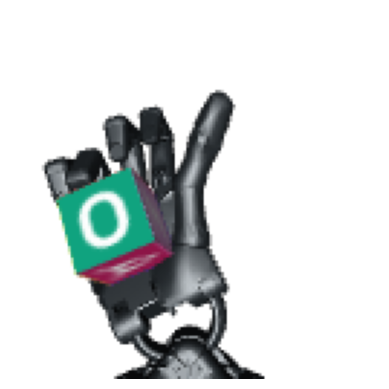

In [9]:
env = apy.make_env(agent.env.spec.id, transformers=agent.env.transformers, render_mode="rgb_array")
investigator.render_episode_jupyter(env)

To summarize, we have seen in this tutorial how we can
- plot the performance of an agent
- evaluate an agent
- render an episode